<a href="https://colab.research.google.com/github/vikasnain6353/ai-ml-intern/blob/main/ai_ml_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FRAUD DETECTION IN CREDIT CARD



In [5]:
# Import Libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="whitegrid")
import random
import tensorflow as tf
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.utils import shuffle
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
LABELS = ["Normal", "Fraud"]
import plotly
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Load the data from the CSV file
df = pd.read_csv('/content/credit_data (1).csv') # Assuming the file is a CSV despite the .zip extension

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
# loc locates all data by column or conditional statement
frauds = df.loc[df['Class'] == 1] # find all rows that are fraudulent
non_frauds = df.loc[df['Class'] == 0] # final all rows that aren't fraudulent
print('Frauds ', len(frauds), ' transactions or ', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('No Fraud ', len(non_frauds), ' transactions or ', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

Frauds  222  transactions or  99.77 % of the dataset
No Fraud  98714  transactions or  0.22 % of the dataset


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,98937.000000,98937.000000,98937.000000,98937.000000,98937.000000,98937.000000,98937.000000,98937.000000,98937.000000,98937.000000,...,98936.000000,98936.000000,98936.000000,98936.000000,98936.000000,98936.000000,98936.000000,98936.000000,98936.000000,98936.000000
mean,42167.853685,-0.262178,-0.033273,0.676054,0.162503,-0.279136,0.094331,-0.108137,0.056310,-0.045449,...,-0.030519,-0.108919,-0.037013,0.009290,0.132099,0.026756,0.000520,0.001660,98.162485,0.002244
std,16941.826357,1.860879,1.658920,1.325889,1.350224,1.357184,1.301437,1.213045,1.206804,1.122271,...,0.719230,0.634337,0.634796,0.594953,0.441061,0.494802,0.394118,0.325739,265.427736,0.047317
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33358.000000,-1.027977,-0.599945,0.176931,-0.712131,-0.898665,-0.647430,-0.600436,-0.137677,-0.699188,...,-0.224495,-0.530911,-0.176414,-0.323371,-0.132021,-0.325186,-0.062607,-0.005373,7.570000,0.000000
50%,44075.000000,-0.260290,0.077659,0.754571,0.191614,-0.314602,-0.157181,-0.069407,0.073841,-0.117869,...,-0.057576,-0.083560,-0.049307,0.064968,0.170010,-0.070298,0.009800,0.023320,26.450000,0.000000
75%,55468.000000,1.153333,0.735430,1.377037,1.032439,0.249762,0.486803,0.415383,0.359852,0.560892,...,0.119418,0.308490,0.081535,0.406304,0.419846,0.301246,0.082945,0.076518,89.000000,0.000000
max,66883.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [10]:
df.isnull().sum().max()

1

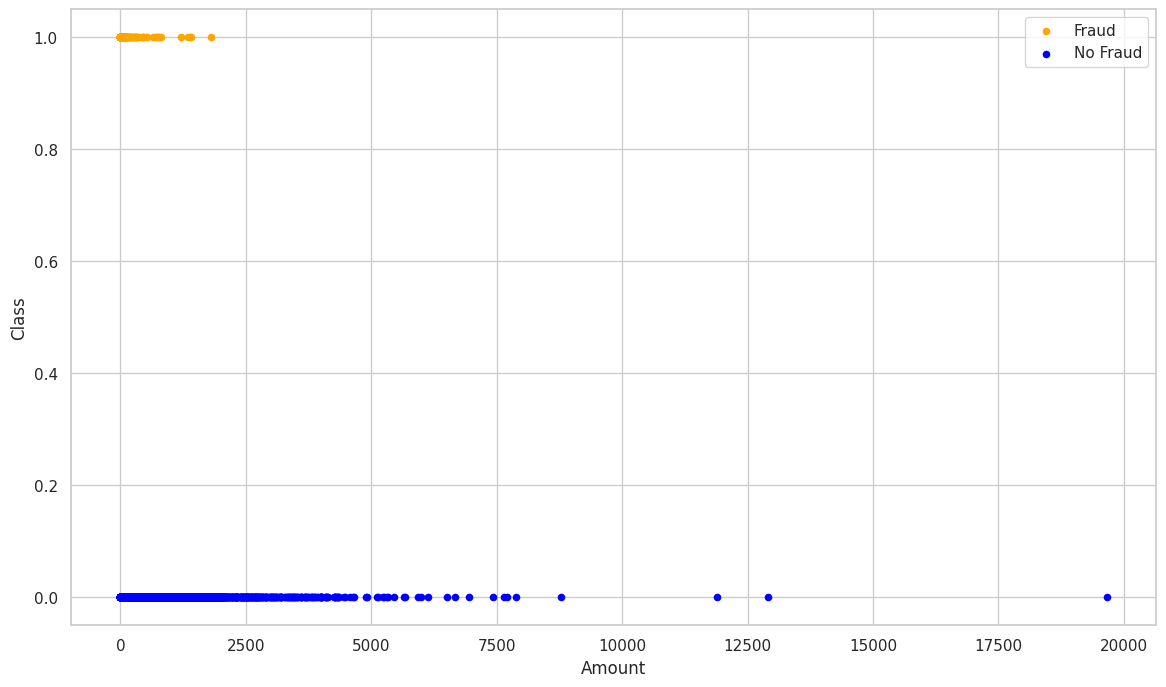

In [11]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='No Fraud', ax=ax)
plt.show()

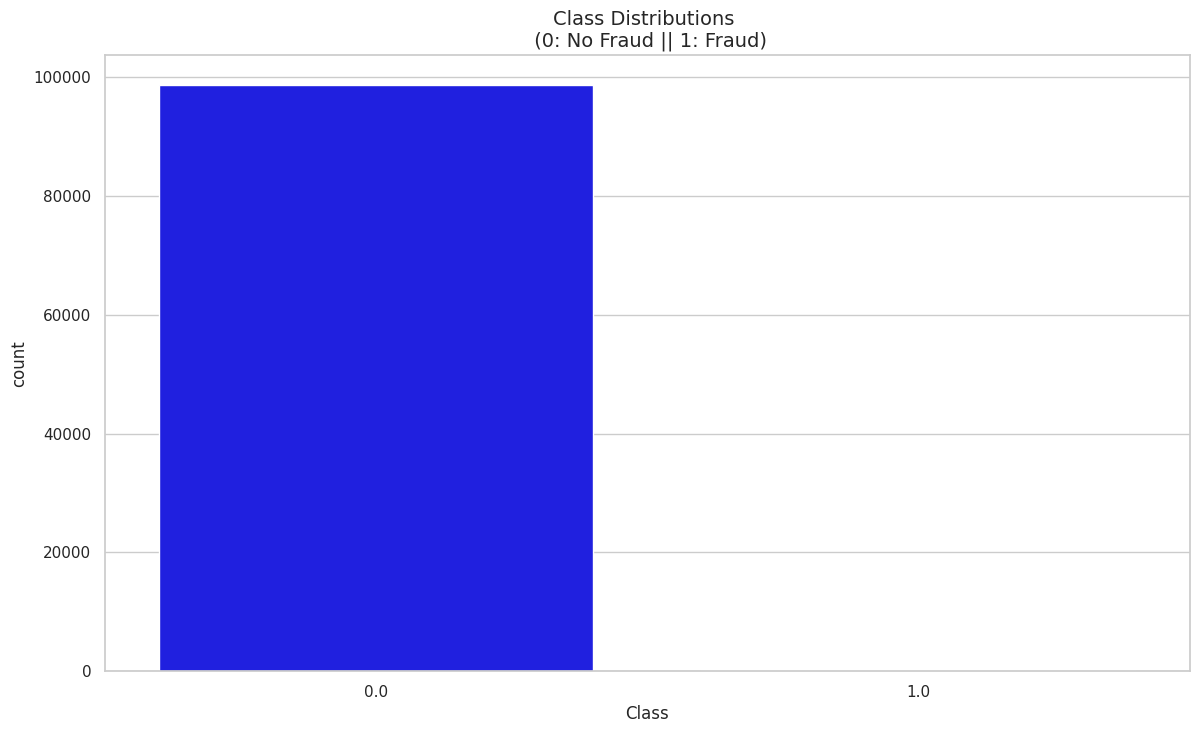

In [13]:
colors = ['Blue', 'Orange']

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

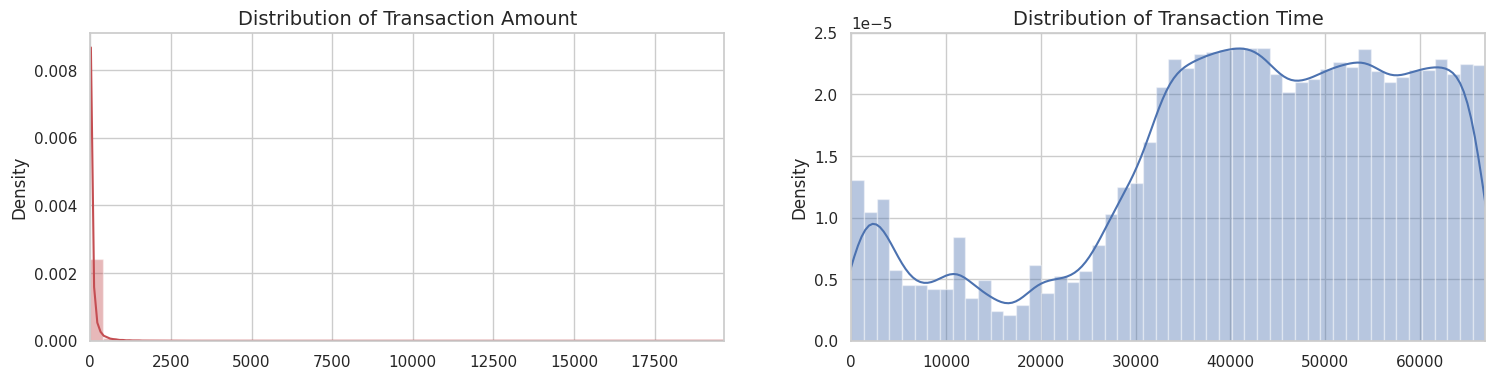

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True) # removing non-scaled time and
# amount from the dataframe

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True) # remove from end
df.insert(0, 'scaled_amount', scaled_amount) # place scaled amount at column 1
df.insert(1, 'scaled_time', scaled_time) # place scaled time at column 2

# Amount and Time are now scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.512587,-1.993442,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.291784,-1.993442,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.325310,-1.993397,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.191821,-1.993397,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.534692,-1.993351,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [20]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

# Drop rows with NaN in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
  print("Train:", train_index, "Test:", test_index)
  original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
  original_y_train, original_y_test = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_y_train))
print(test_counts_label/ len(original_y_test))

No Frauds 99.77 % of the dataset
Frauds 0.22 % of the dataset
Train: [19785 19786 19787 ... 98933 98934 98935] Test: [    0     1     2 ... 19939 19971 20248]
Train: [    0     1     2 ... 98933 98934 98935] Test: [19785 19786 19787 ... 48346 49411 49600]
Train: [    0     1     2 ... 98933 98934 98935] Test: [39560 39561 39562 ... 66590 67033 67350]
Train: [    0     1     2 ... 98933 98934 98935] Test: [59342 59343 59344 ... 80703 81955 82551]
Train: [    0     1     2 ... 80703 81955 82551] Test: [79137 79138 79139 ... 98933 98934 98935]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99776371 0.00223629]
[0.99772578 0.00227422]


In [19]:
df = df.sample(frac=1)

# amount of fraud classes
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
74496,-0.314626,0.521891,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,...,0.073164,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,1.0
12708,-0.179295,-0.985844,1.185478,-0.349048,1.003962,-0.558501,-0.996560,-0.313915,-0.756859,0.045546,...,-0.205244,-0.133403,0.102803,0.001049,0.026254,0.386216,-0.695253,0.078639,0.026471,0.0
10568,-0.312538,-1.201040,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,...,1.455878,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.0
79417,0.387081,0.630574,-0.533621,0.992566,2.634703,2.936103,-0.312267,-0.314395,0.759661,-0.142407,...,0.261542,-0.229074,-0.753813,0.116195,0.831772,-0.257281,-0.100929,-0.108885,-0.119388,0.0
62769,-0.300258,0.286929,1.172374,-0.155623,0.019576,0.022615,-0.075897,0.127076,-0.149974,0.209108,...,-0.227550,0.005064,0.143253,-0.021604,-0.214319,0.330802,1.135900,-0.071794,-0.026839,0.0


Distribution of the Classes in the subsample dataset
Class
0.0    0.689076
1.0    0.310924
Name: count, dtype: float64


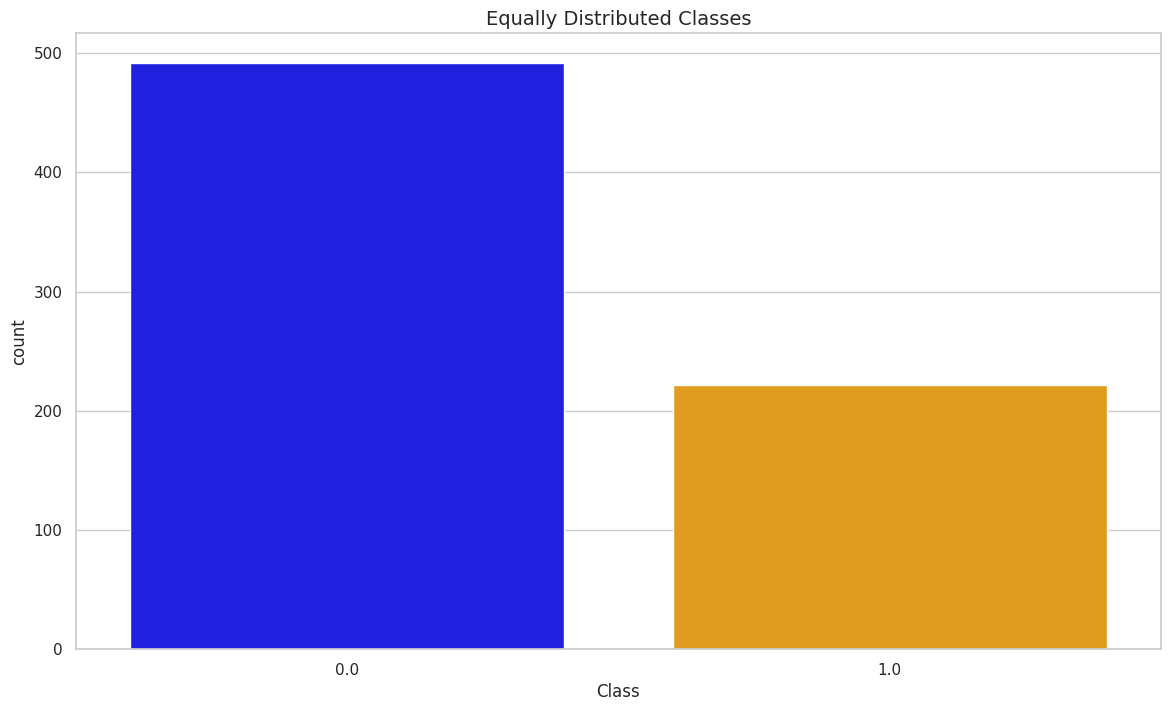

In [24]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df)) # percentage for each class

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

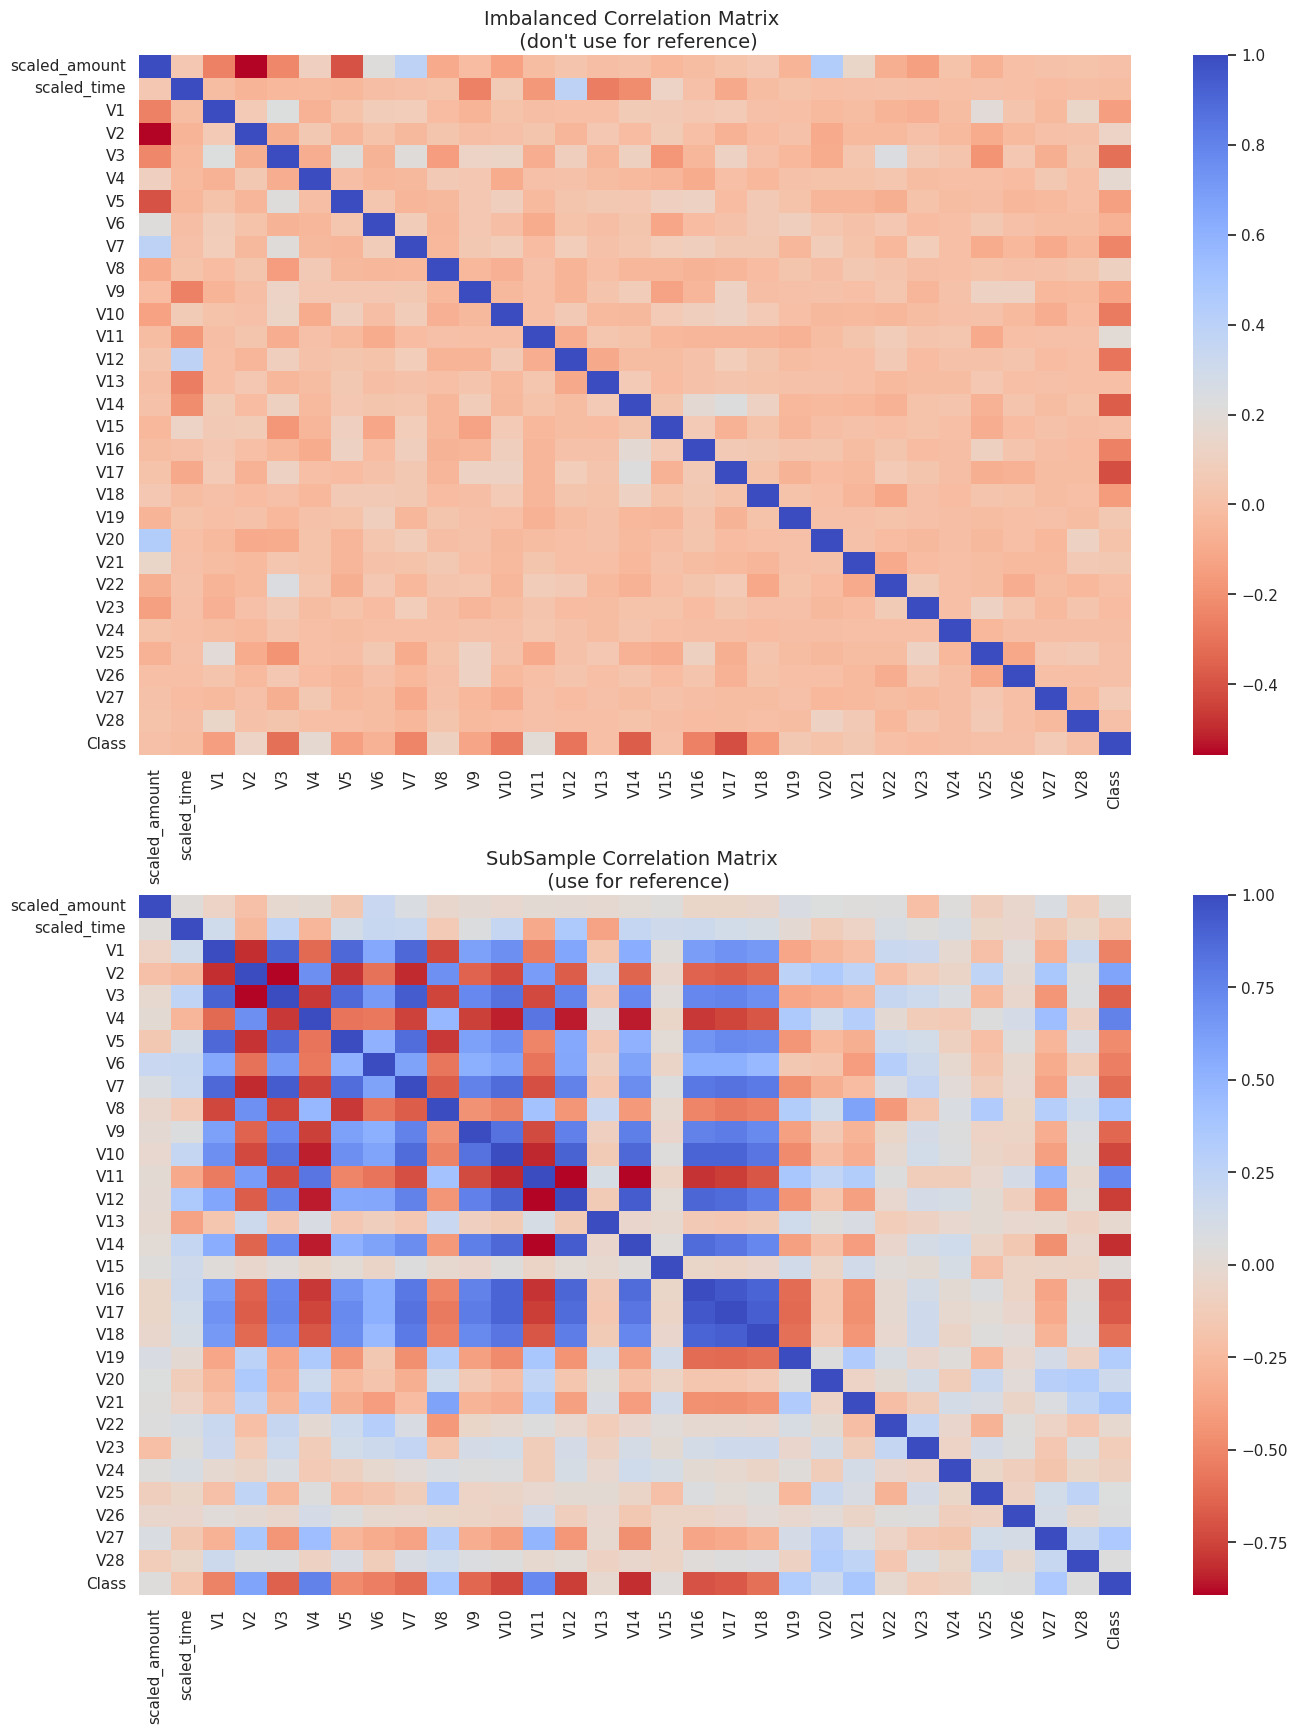

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 20))

# Entire DataFrame (to show how the correlation looks like in an imbalanced dataset)
corr = df.corr() # calculate correlation between features
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# Subsampled DataFrame
sub_sample_corr = new_df.corr() # calculate correlation between features
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title("SubSample Correlation Matrix \n (use for reference)", fontsize=14)
plt.show()

In [23]:
sol = (sub_sample_corr.where(np.triu(np.ones(sub_sample_corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print(sol[0:9])
print(sol[-9:-1])

V16  V17    0.950107
V12  V14    0.932693
V3   V7     0.927540
V17  V18    0.918732
V1   V3     0.900967
V10  V12    0.900364
V16  V18    0.893541
V10  V17    0.891115
     V16    0.890640
dtype: float64
V14  Class   -0.817223
V2   V7      -0.824400
V10  V11     -0.831771
V4   V10     -0.845334
     V12     -0.852133
     V14     -0.852471
V2   V3      -0.888325
V11  V14     -0.891661
dtype: float64


In [25]:
print(sub_sample_corr['Class'].sort_values(ascending=False))

Class            1.000000
V4               0.759574
V11              0.733736
V2               0.586457
V8               0.389494
V21              0.372672
V27              0.350659
V19              0.321710
V20              0.156323
V25              0.054251
V28              0.050282
V26              0.049968
scaled_amount    0.045701
V15              0.026573
V13             -0.017650
V22             -0.017894
V24             -0.088631
V23             -0.120693
scaled_time     -0.171515
V5              -0.481448
V1              -0.521834
V6              -0.536658
V18             -0.591314
V7              -0.609478
V9              -0.627887
V3              -0.653880
V17             -0.679254
V16             -0.701653
V10             -0.742037
V12             -0.773238
V14             -0.817223
Name: Class, dtype: float64


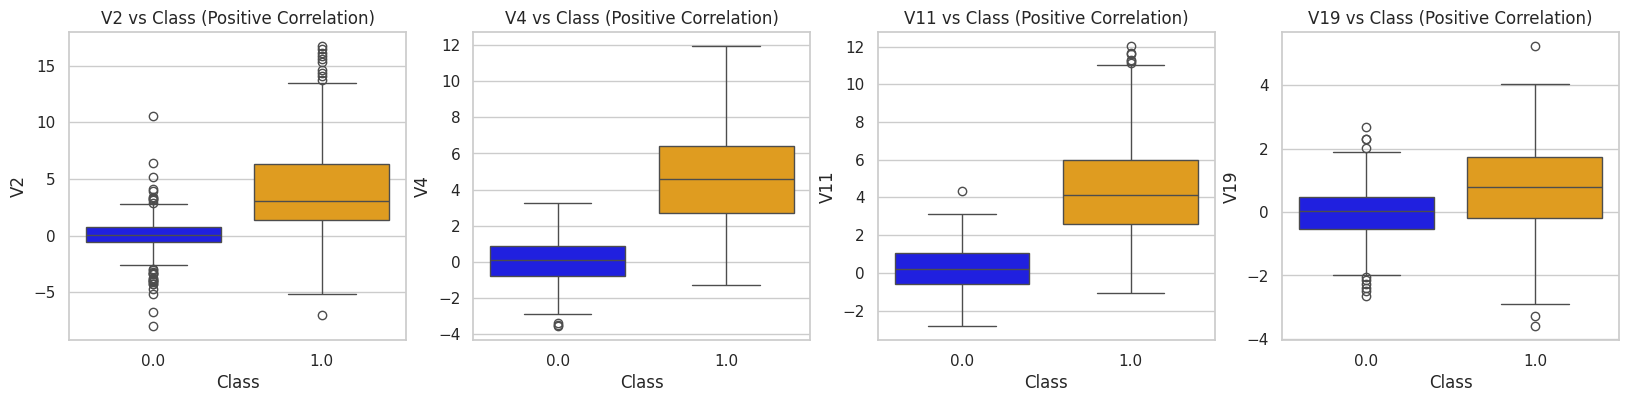

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Creating the boxplot
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V11 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class (Positive Correlation)')

plt.show()

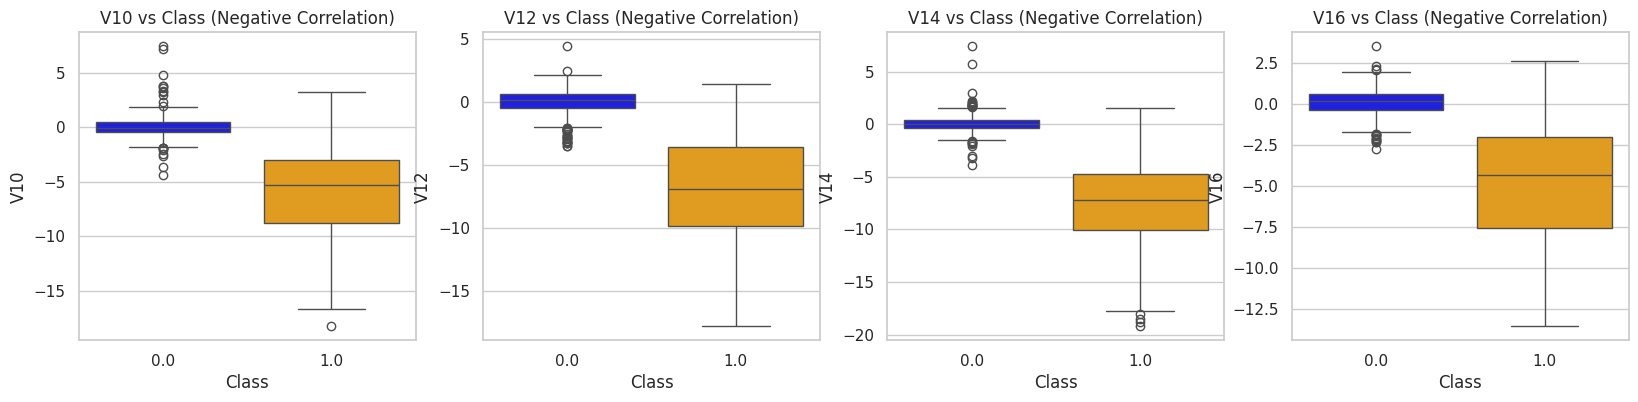

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Creating the boxplot (negative correlation)
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V10 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V12 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V14 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V16", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V16 vs Class (Negative Correlation)')

plt.show()

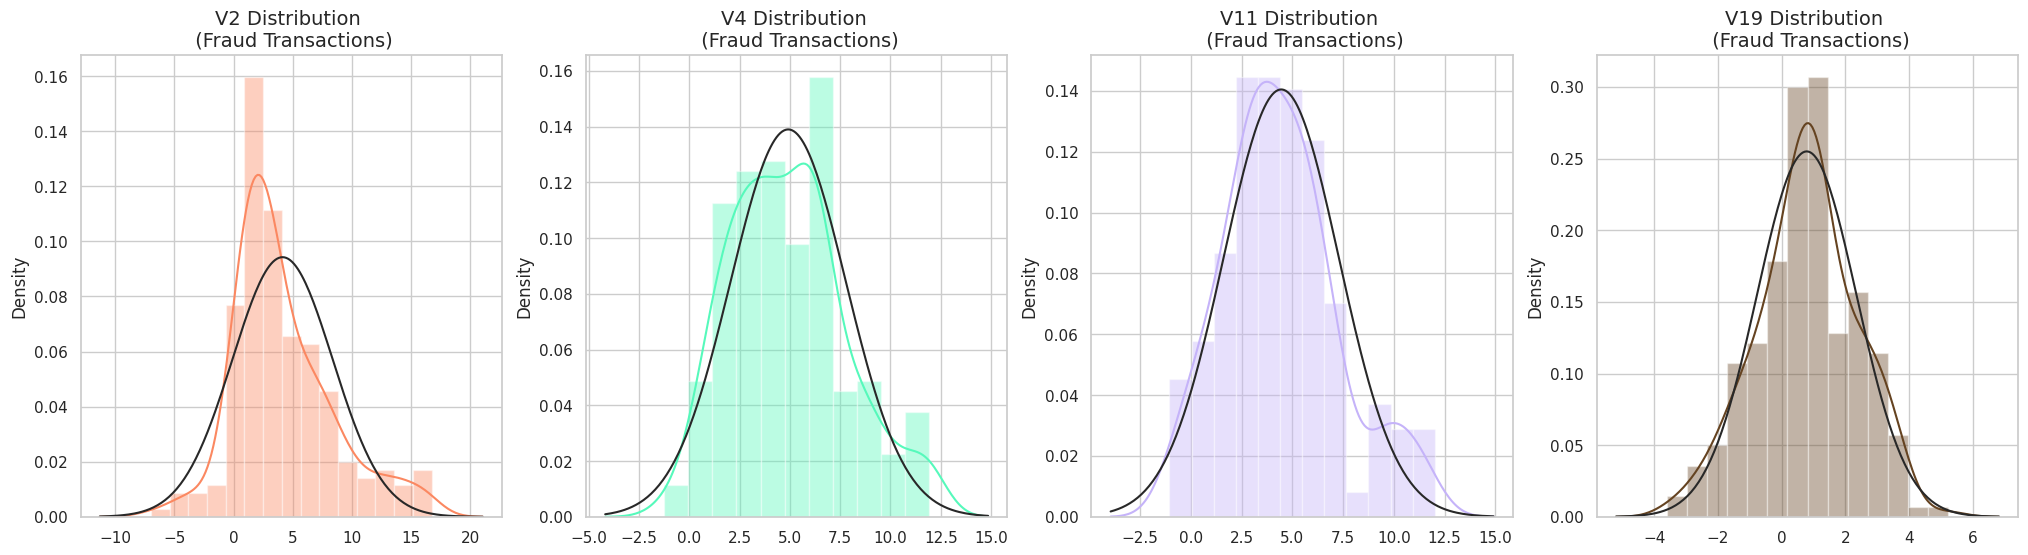

In [28]:
from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 6))

V2_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
sns.distplot(V2_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V2 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
sns.distplot(v4_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V4 Distribution \n (Fraud Transactions)', fontsize=14)


v11_fraud_dist = new_df['V11'].loc[new_df['Class'] == 1].values
sns.distplot(v11_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V11 Distribution \n (Fraud Transactions)', fontsize=14)

v19_fraud_dist = new_df['V19'].loc[new_df['Class'] == 1].values
sns.distplot(v19_fraud_dist,ax=ax4, fit=norm, color='#654321')
ax4.set_title('V19 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

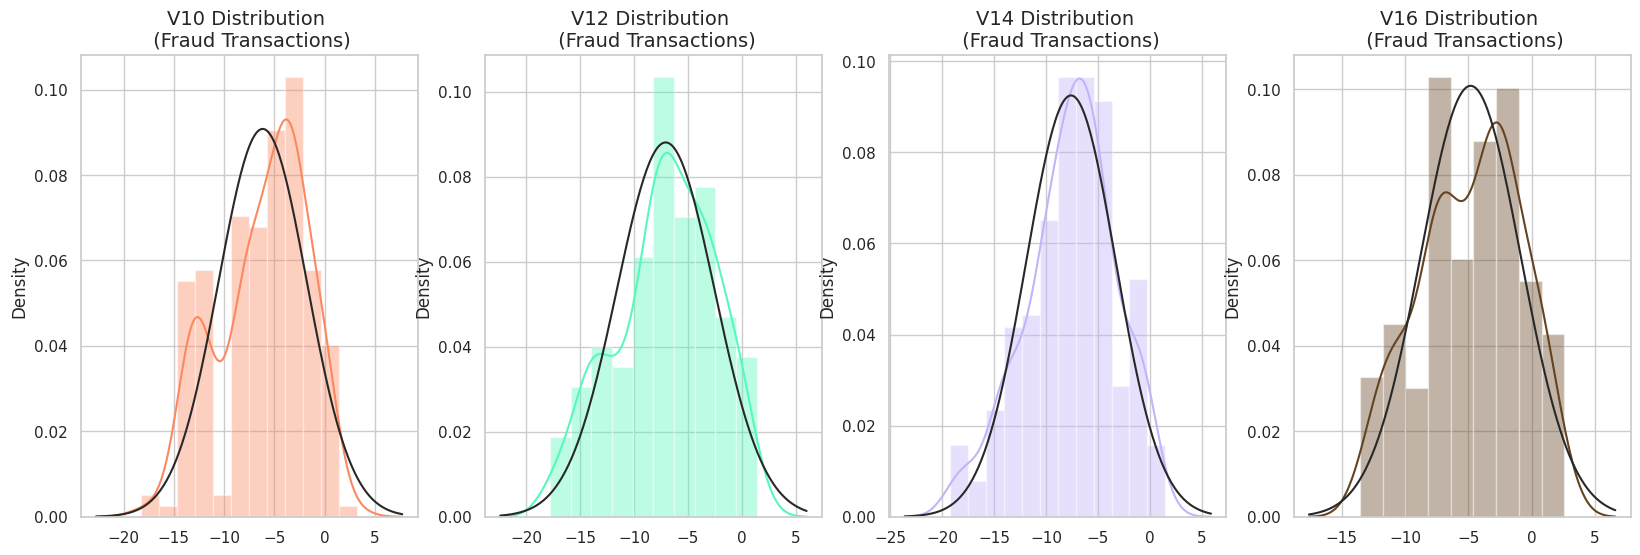

In [29]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

V10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(V10_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v16_fraud_dist = new_df['V16'].loc[new_df['Class'] == 1].values
sns.distplot(v16_fraud_dist,ax=ax4, fit=norm, color='#654321')
ax4.set_title('V16 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [30]:
multiplier_for_threshold = 1.5

# -----> V14
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * multiplier_for_threshold
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

# check in V14 to find extreme outliers; the ones who pass the threshold
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 outliers:{}'.format(outliers))
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# -----> V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75 - q25
print('iqr: {}'.format(v12_iqr))

v12_cut_off = v12_iqr * multiplier_for_threshold
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# -----> V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75 - q25
print('iqr: {}'.format(v10_iqr))

v10_cut_off = v10_iqr * multiplier_for_threshold
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

# # -----> V4
# v4_fraud = new_df['V4'].loc[new_df['Class'] == 1].values
# q25, q75 = np.percentile(v4_fraud, 25), np.percentile(v4_fraud, 75)
# print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
# v4_iqr = q75 - q25
# print('iqr: {}'.format(v4_iqr))

# v4_cut_off = v4_iqr * multiplier_for_threshold
# v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off
# print('Cut Off: {}'.format(v4_cut_off))
# print('V4 Lower: {}'.format(v4_lower))
# print('V4 Upper: {}'.format(v4_upper))

# outliers = [x for x in v4_fraud if x < v4_lower or x > v4_upper]
# print('V4 outliers:{}'.format(outliers))
# print('Feature V4 Outliers for Fraud Cases: {}'.format(len(outliers)))
# print('----' * 44)

# # -----> V2
# v2_fraud = new_df['V2'].loc[new_df['Class'] == 1].values
# q25, q75 = np.percentile(v2_fraud, 25), np.percentile(v2_fraud, 75)
# print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
# v2_iqr = q75 - q25
# print('iqr: {}'.format(v2_iqr))

# v2_cut_off = v2_iqr * multiplier_for_threshold
# v2_lower, v2_upper = q25 - v12_cut_off, q75 + v2_cut_off
# print('V2 Lower: {}'.format(v2_lower))
# print('V2 Upper: {}'.format(v2_upper))
# outliers = [x for x in v2_fraud if x < v2_lower or x > v2_upper]
# print('V2 outliers: {}'.format(outliers))
# print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))
# print('----' * 44)

# # -----> V11
# v11_fraud = new_df['V11'].loc[new_df['Class'] == 1].values
# q25, q75 = np.percentile(v11_fraud, 25), np.percentile(v11_fraud, 75)
# print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
# v11_iqr = q75 - q25
# print('iqr: {}'.format(v11_iqr))

# v11_cut_off = v11_iqr * multiplier_for_threshold
# v11_lower, v11_upper = q25 - v11_cut_off, q75 + v11_cut_off
# print('Cut Off: {}'.format(v11_cut_off))
# print('V11 Lower: {}'.format(v11_lower))
# print('V11 Upper: {}'.format(v11_upper))

# # check in V14 to find extreme outliers; the ones who pass the threshold
# outliers = [x for x in v11_fraud if x < v11_lower or x > v11_upper]
# print('V11 outliers:{}'.format(outliers))
# print('Feature V11 Outliers for Fraud Cases: {}'.format(len(outliers)))

Quartile 25: -10.0184033525 | Quartile 75: -4.74757862225
iqr: 5.27082473025
Cut Off: 7.906237095375
V14 Lower: -17.924640447875
V14 Upper: 3.1586584731250005
V14 outliers:[np.float64(-18.04999769), np.float64(-19.21432549), np.float64(-18.82208674), np.float64(-18.49377336)]
Feature V14 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 708
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -9.43575132425 | Quartile 75: -3.5731389234999997
iqr: 5.862612400750001
V12 Lower: -18.229669925375
V12 Upper: 5.220779677625
V12 outliers: []
Feature V12 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 708
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.563890811250001 | Qu

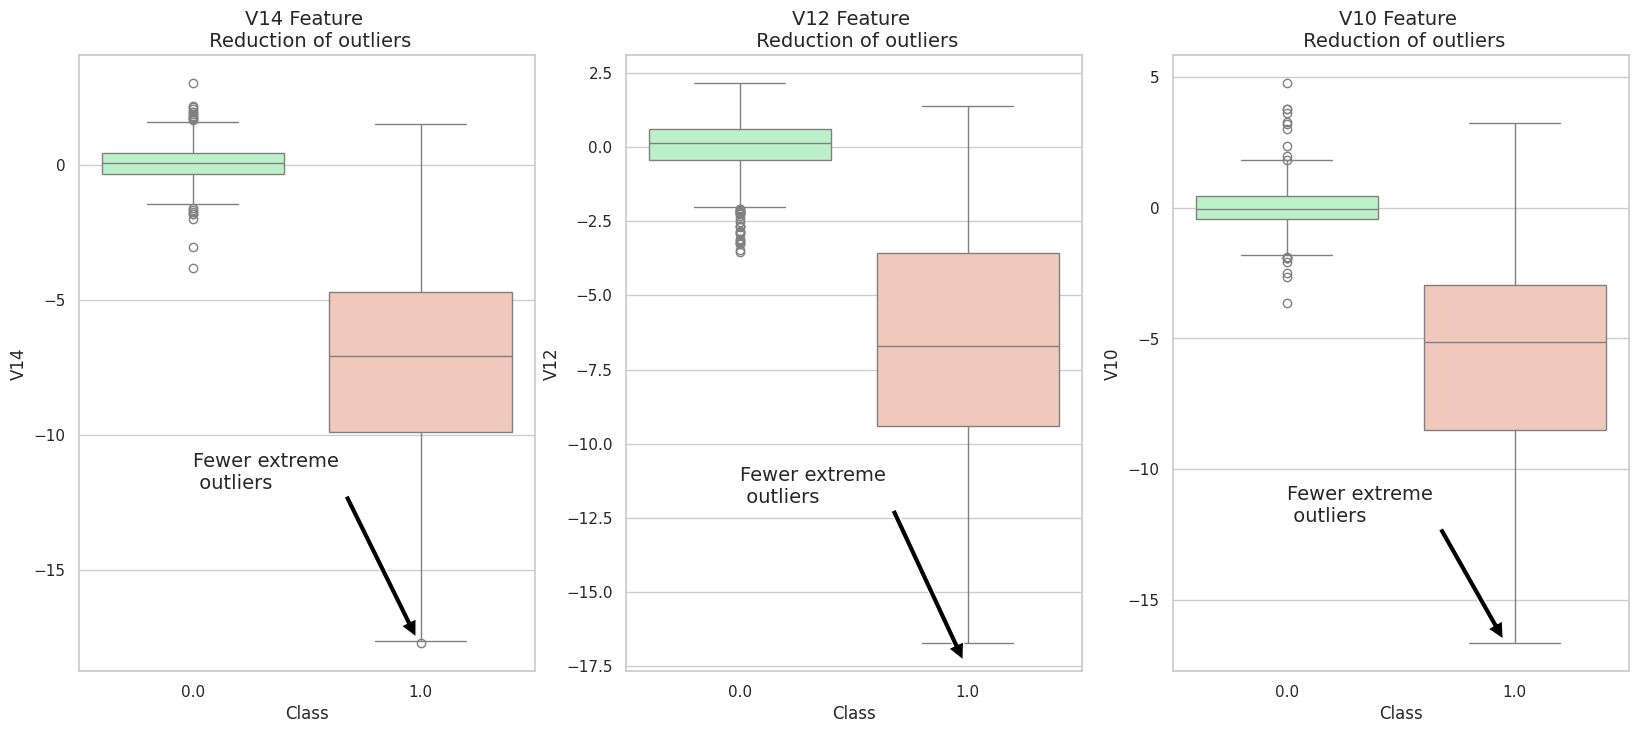

In [31]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()

In [32]:
# let's update our inputs and outputs
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# t-SNE
t0 = time.time() # for calculating the time it takes to do t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('t-SNE took {:.2} s'.format(t1 - t0))

# PCA
t0 = time.time() # for calculating the time it takes to do t-SNE
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('PCA took {:.2} s'.format(t1 - t0))

# Truncated SVD (basically PCA but for sparse data)
t0 = time.time() # for calculating the time it takes to do t-SNE
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('Truncated SVD took {:.2} s'.format(t1 - t0))

t-SNE took 1.1e+01 s
PCA took 0.008 s
Truncated SVD took 0.0044 s


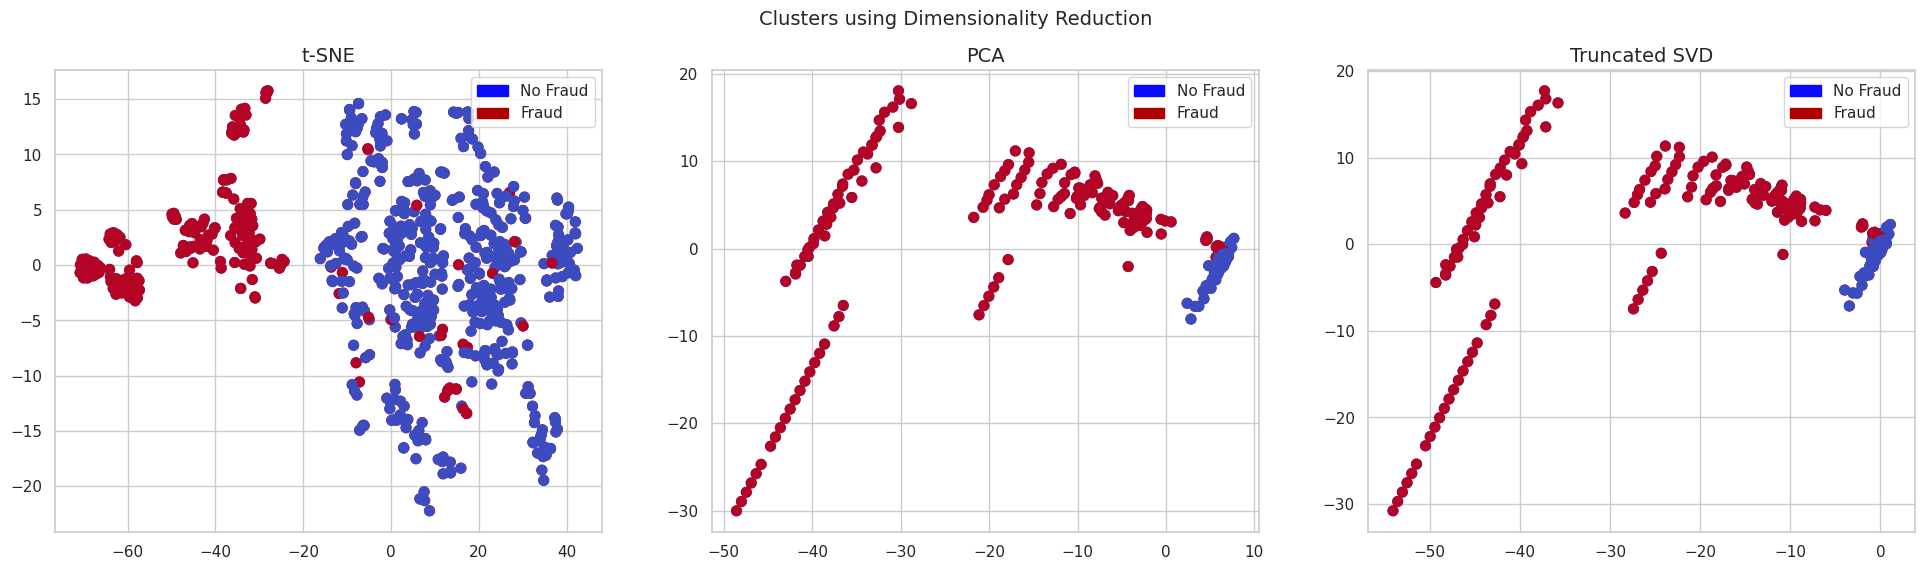

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [34]:
# let's update our inputs and outputs
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Let's split our data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn values into an array for feeding the classifications algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [35]:
from xgboost import XGBClassifier

# Use GridSearchCV to find the best paramaters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# xgboost
xgboost_params = {'objective': ["binary:logistic"]
      , 'eta': [0.01, 0.1, 0.2, 0.3]
			, 'max_depth': [3, 6, 9]
			, 'min_child_weight': [1, 10, 100, 1000]
			, 'eval_metric': ["auc"]
      }

grid_xgboost = GridSearchCV(XGBClassifier(), xgboost_params)
grid_xgboost.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
xgboost_model = grid_xgboost.best_estimator_

In [36]:
print(log_reg)
print(xgboost_model)


LogisticRegression(C=0.1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='auc',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)


In [37]:
from sklearn.model_selection import cross_val_score

# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ',
      round(log_reg_score.mean() * 100, 2).astype(str) + '%')

xgboost_score = cross_val_score(xgboost_model, X_train, y_train, cv=5)
print('XGBoost Cross Validation Score: ',
      round(xgboost_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  96.27%
XGBoost Cross Validation Score:  96.28%


In [41]:
from sklearn.model_selection import StratifiedKFold
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state = 42, shuffle=True)

for train_index, test_index in sss.split(undersample_X, undersample_y):
  print("Train:", train_index, "Test:", test_index)
  undersample_X_train, undersample_X_test = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
  undersample_y_train, undersample_y_test = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_X_train = undersample_X_train.values
undersample_X_test = undersample_X_test.values
undersample_y_train = undersample_y_train.values
undersample_y_test = undersample_y_test.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels; we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating the right way

for train, test in sss.split(undersample_X_train, undersample_y_train):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_X_train[train], undersample_y_train[train])
    undersample_prediction = undersample_model.predict(undersample_X_train[test])

    undersample_accuracy.append(undersample_pipeline.score(original_X_train[test], original_y_train[test]))
    undersample_precision.append(precision_score(original_y_train[test], undersample_prediction))
    undersample_recall.append(recall_score(original_y_train[test], undersample_prediction))
    undersample_f1.append(f1_score(original_y_train[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_y_train[test], undersample_prediction))

Train: [    0     1     3 ... 98930 98932 98933] Test: [    2     7     9 ... 98931 98934 98935]
Train: [    1     2     3 ... 98933 98934 98935] Test: [    0     8    10 ... 98909 98912 98929]
Train: [    0     1     2 ... 98933 98934 98935] Test: [    3    28    30 ... 98924 98927 98932]
Train: [    0     1     2 ... 98932 98934 98935] Test: [    4    12    15 ... 98923 98926 98933]
Train: [    0     2     3 ... 98933 98934 98935] Test: [    1     5     6 ... 98915 98928 98930]
NearMiss Label Distribution: Counter({np.float64(0.0): 222, np.float64(1.0): 222})


In [43]:
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state = 42, shuffle=True)

for train_index, test_index in sss.split(undersample_X, undersample_y):
  print("Train:", train_index, "Test:", test_index)
  undersample_X_train, undersample_X_test = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
  undersample_y_train, undersample_y_test = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_X_train = undersample_X_train.values
undersample_X_test = undersample_X_test.values
undersample_y_train = undersample_y_train.values
undersample_y_test = undersample_y_test.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels; we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating the right way

for train, test in sss.split(undersample_X_train, undersample_y_train):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_X_train[train], undersample_y_train[train])
    undersample_prediction = undersample_model.predict(undersample_X_train[test])

    undersample_accuracy.append(undersample_pipeline.score(original_X_train[test], original_y_train[test]))
    undersample_precision.append(precision_score(original_y_train[test], undersample_prediction))
    undersample_recall.append(recall_score(original_y_train[test], undersample_prediction))
    undersample_f1.append(f1_score(original_y_train[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_y_train[test], undersample_prediction))

Train: [    0     1     3 ... 98930 98932 98933] Test: [    2     7     9 ... 98931 98934 98935]
Train: [    1     2     3 ... 98933 98934 98935] Test: [    0     8    10 ... 98909 98912 98929]
Train: [    0     1     2 ... 98933 98934 98935] Test: [    3    28    30 ... 98924 98927 98932]
Train: [    0     1     2 ... 98932 98934 98935] Test: [    4    12    15 ... 98923 98926 98933]
Train: [    0     2     3 ... 98933 98934 98935] Test: [    1     5     6 ... 98915 98928 98930]
NearMiss Label Distribution: Counter({np.float64(0.0): 222, np.float64(1.0): 222})


Logistic Regression:  0.9755576649264356


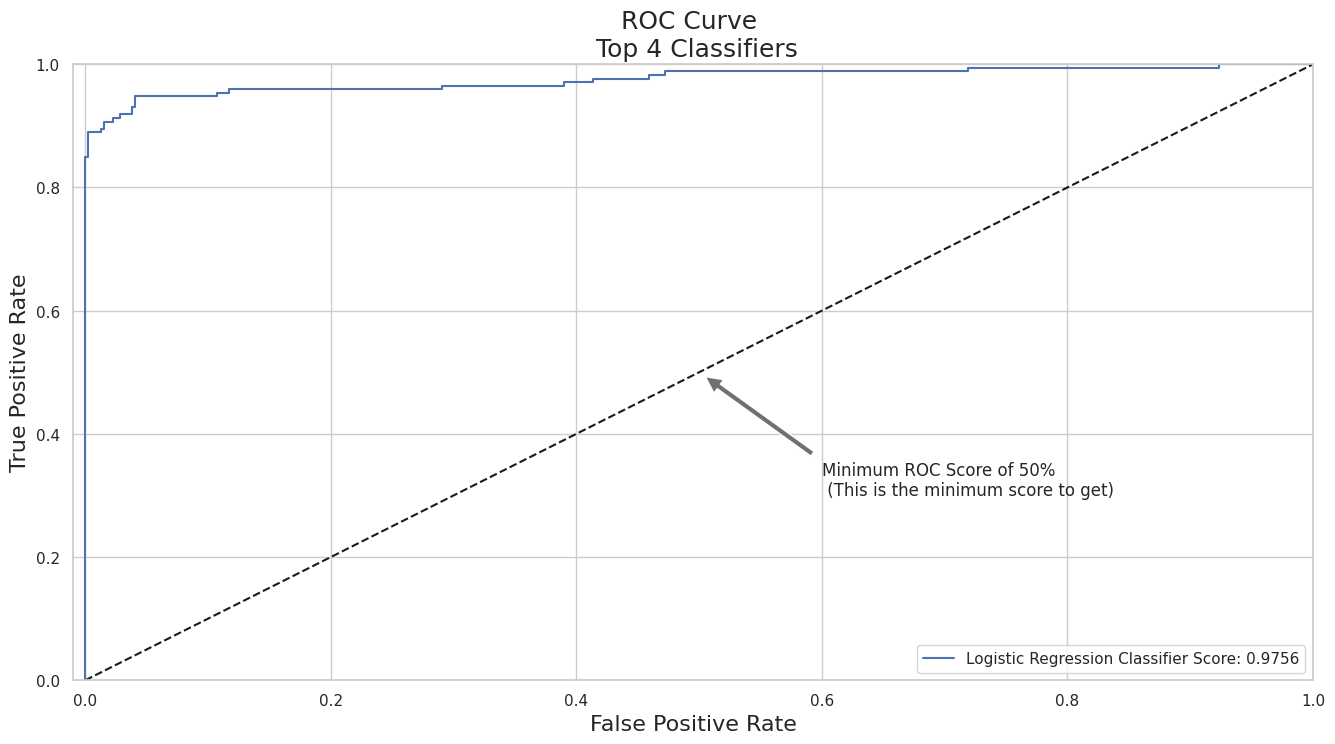

In [52]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot([0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr)
plt.show()

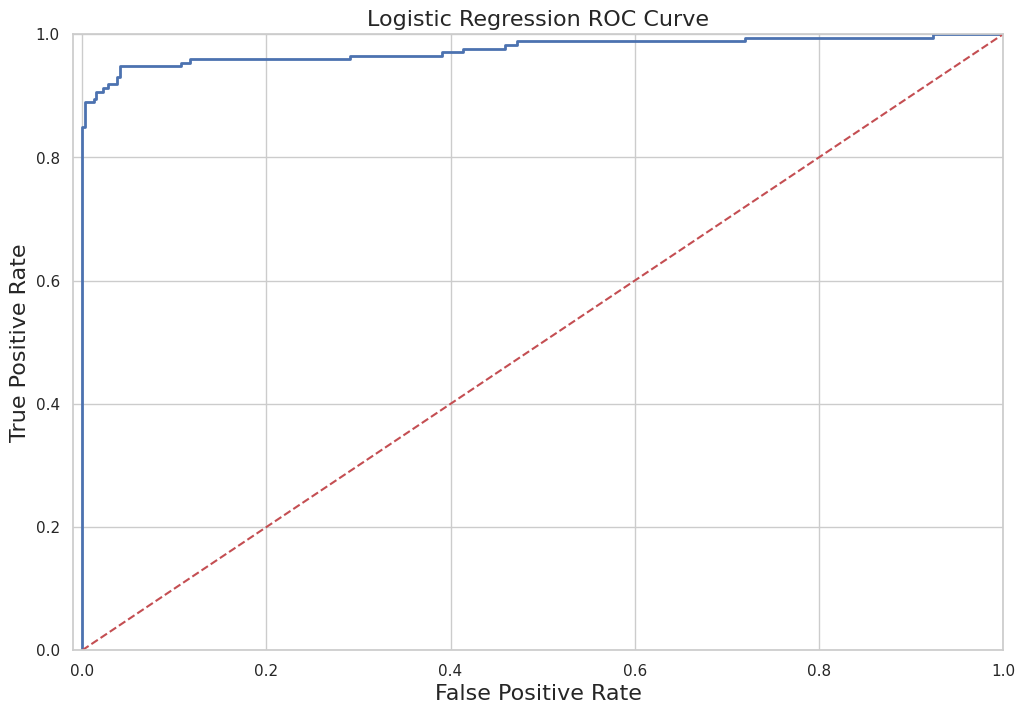

In [53]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [55]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.91
Precision Score: 0.76
F1 Score: 0.83
Accuracy Score: 0.88
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.82
Precision Score: 0.00
Recall Score: 0.10
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [56]:
undersample_y_score = log_reg.decision_function(original_X_test)

In [57]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_y_test,
                                                        undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.16


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.16')

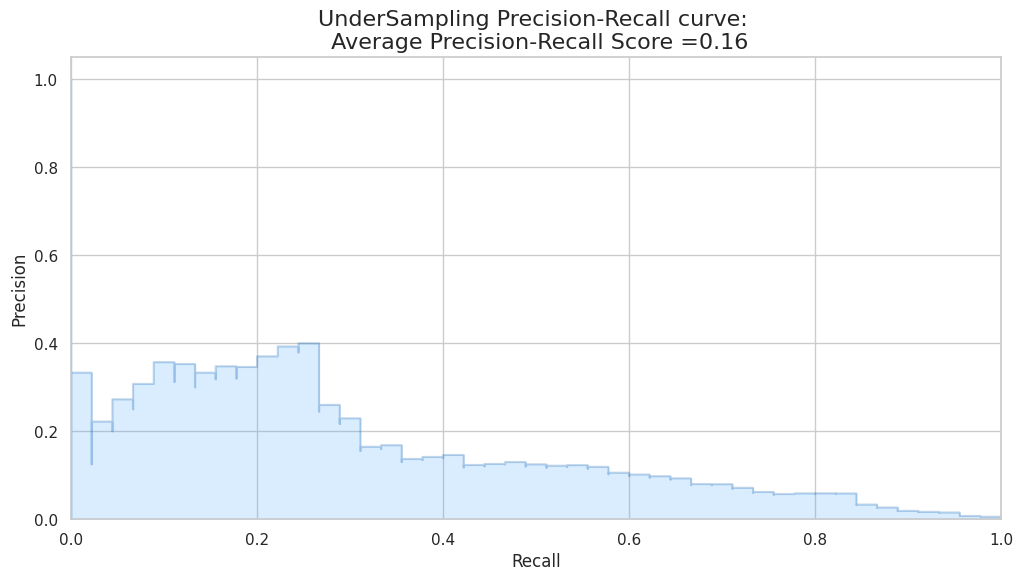

In [58]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_y_test, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [48]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

d = {'Technique': ['Random UnderSampling'],
     'Score': [undersample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading!
final_df

#0.798942

,Technique,Score
0,Random UnderSampling,0.858156


MOVIE RECOMENDATION SYSTEM (small dataset)

In [ ]:
import pygame
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample Bollywood movie dataset (title, description)
movies = [
    ("3 Idiots", "comedy drama education friendship college life"),
    ("Dangal", "sports wrestling daughters inspiring biopic"),
    ("Zindagi Na Milegi Dobara", "friendship travel adventure relationships life"),
    ("Gully Boy", "rap music dreams struggle street life"),
    ("Kabir Singh", "romance love heartbreak intense passion"),
    ("Dilwale Dulhania Le Jayenge", "romance love Europe family drama"),
    ("Chak De! India", "sports hockey women empowerment patriotism"),
    ("Queen", "self discovery solo trip Europe growth"),
    ("Bajrangi Bhaijaan", "adventure drama cross border compassion"),
    ("Barfi!", "love story disabilities emotions comedy drama")
]

# Extract titles and descriptions
titles = [title for title, desc in movies]
descriptions = [desc for title, desc in movies]

# Vectorize the descriptions
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(descriptions)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

# Recommendation function
def recommend(title, top_n=5):
    if title not in titles:
        return ["Movie not found in database."]

    idx = titles.index(title)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []
    for i, score in sim_scores[1:top_n+1]:
        recommendations.append(f"{titles[i]} (Similarity: {score:.2f})")
    return recommendations

# Pygame setup
pygame.init()
WIDTH, HEIGHT = 800, 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Bollywood Movie Recommendation System")

# Colors
WHITE = (255, 255, 255)
LIGHT_GRAY = (240, 240, 240)
GRAY = (200, 200, 200)
DARK_GRAY = (50, 50, 50)
BLACK = (0, 0, 0)
BLUE = (100, 149, 237)
DARK_BLUE = (70, 130, 180)
BG_TOP = (255, 200, 200)    # Light pinkish gradient top
BG_BOTTOM = (200, 220, 255) # Light blueish gradient bottom

# Fonts
font = pygame.font.SysFont("Arial", 24)
big_font = pygame.font.SysFont("Arial", 36, bold=True)
title_font = pygame.font.SysFont("Arial", 28, bold=True)

# Input Box
input_box = pygame.Rect(50, 80, 700, 45)
input_text = ''
active = False

# Button
button_rect = pygame.Rect(330, 140, 140, 45)

# Output Area
output_box = pygame.Rect(50, 220, 700, 250)
recommendations = []

def draw_rounded_rect(surface, color, rect, radius=10):
    """Draw a rounded rectangle."""
    pygame.draw.rect(surface, color, rect, border_radius=radius)

def draw_gradient_background(surface, top_color, bottom_color):
    """Draw a vertical gradient background."""
    for y in range(HEIGHT):
        blend = y / HEIGHT
        r = int(top_color[0] * (1 - blend) + bottom_color[0] * blend)
        g = int(top_color[1] * (1 - blend) + bottom_color[1] * blend)
        b = int(top_color[2] * (1 - blend) + bottom_color[2] * blend)
        pygame.draw.line(surface, (r, g, b), (0, y), (WIDTH, y))

running = True
while running:
    draw_gradient_background(screen, BG_TOP, BG_BOTTOM)

    # Draw the Title
    header = title_font.render("Bollywood Movie Recommendation System", True, DARK_GRAY)
    screen.blit(header, (WIDTH // 2 - header.get_width() // 2, 20))

    # Draw the input label
    label = font.render("Enter Movie Title:", True, BLACK)
    screen.blit(label, (50, 50))

    # Draw the input box
    draw_rounded_rect(screen, WHITE, input_box, radius=8)
    pygame.draw.rect(screen, BLUE if active else GRAY, input_box, 2, border_radius=8)
    txt_surface = font.render(input_text, True, BLACK)
    screen.blit(txt_surface, (input_box.x + 10, input_box.y + 10))

    # Draw the button
    draw_rounded_rect(screen, DARK_BLUE, button_rect, radius=8)
    button_text = font.render("Recommend", True, WHITE)
    screen.blit(button_text, (button_rect.x + 20, button_rect.y + 10))

    # Draw the output box
    draw_rounded_rect(screen, WHITE, output_box, radius=10)
    pygame.draw.rect(screen, DARK_BLUE, output_box, 2, border_radius=10)

    # Display recommendations
    y = output_box.y + 20
    if recommendations:
        result_label = font.render("Top Recommendations:", True, BLACK)
        screen.blit(result_label, (output_box.x + 20, y))
        y += 40
        for rec in recommendations:
            # Draw bullet point
            bullet_x = output_box.x + 30
            bullet_y = y + 10
            pygame.draw.circle(screen, DARK_BLUE, (bullet_x, bullet_y), 5)
            rec_text = font.render(rec, True, DARK_GRAY)
            screen.blit(rec_text, (bullet_x + 20, y))
            y += 35

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            if input_box.collidepoint(event.pos):
                active = True
            else:
                active = False
            if button_rect.collidepoint(event.pos):
                if input_text.strip():
                    recommendations = recommend(input_text.strip())
                else:
                    recommendations = ["Please enter a movie title."]

        elif event.type == pygame.KEYDOWN:
            if active:
                if event.key == pygame.K_RETURN:
                    if input_text.strip():
                        recommendations = recommend(input_text.strip())
                    else:
                        recommendations = ["Please enter a movie title."]
                elif event.key == pygame.K_BACKSPACE:
                    input_text = input_text[:-1]
                else:
                    input_text += event.unicode

    pygame.display.flip()

pygame.quit()
sys.exit()


pygame 2.6.1 (SDL 2.28.4, Python 3.12.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


Using large dataset

In [ ]:
import pygame
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
movies = [
      ("Chhichhore", "college life friendship motivation comedy drama"),
      ("Taare Zameen Par", "emotional education drama parenting self-discovery"),
      ("Student of the Year", "college competition romance friendship glamour"),
      ("Rang De Basanti", "youth patriotism friendship drama awakening"),
      ("Wake Up Sid", "self-discovery career college life Mumbai drama"),
      ("Kota Factory", "education coaching struggle friendship motivation"),
      ("Dear Zindagi", "mental health growth therapy life lessons youth"),
      ("2 States", "romance culture college family drama love story"),
      ("Nil Battey Sannata", "mother-daughter education dream social drama"),
      ("Super 30", "inspiration education real-life struggle genius drama"),
      ("Anand", "life illness positivity friendship philosophy emotional drama"),
      ("PK", "curiosity satire religion philosophy alien comedy drama"),
      ("OMG: Oh My God!", "religion faith satire humanity social message"),
      ("Munna Bhai M.B.B.S.", "medical kindness transformation humor emotional"),
      ("Black", "disability education hope teacher-student emotional drama"),
      ("Hichki", "teacher-student education disorder resilience inspiration"),
      ("Swades", "NRI rural development patriotism education life change"),
      ("Udaan", "freedom abuse dream poetry teenager father-son"),
      ("The Lunchbox", "loneliness connection routine love subtle drama"),
      ("Dear Zindagi", "therapy healing emotions life journey mental health"),
      ("English Vinglish", "self-respect growth language identity woma empowerment"),
      ("Piku", "family old age responsibility humor emotional journey"),
      ("Tamasha", "self-discovery societal pressure identity love drama"),
      ("Barfi!", "innocence disability love triangle comedy emotional"),
      ("Stanley Ka Dabba", "school food friendship teacher emotional child life"),
      ("Wake Up Sid", "career self-growth youth relationships family life"),
      ("Taare Zameen Par", "dyslexia childhood parenting creativity education emotional"),
      ("October", "caregiver compassion emotions life slow drama"),
      ("Chhichhore", "college suicide motivation friendship success failure"),
      ("Lage Raho Munna Bhai", "Gandhian values change humor inspiration drama"),
      ("Rocket Singh", "business honesty ethics sales youth drama"),
      ("Bhaag Milkha Bhaag", "sports biopic trauma discipline determination struggle"),
      ("Super 30", "education poverty genius struggle real-life inspiration"),
      ("Nil Battey Sannata", "mother-daughter dream education class struggle"),
      ("Gunjan Saxena", "aviation women empowerment military ambition emotional"),
      ("The Sky is Pink", "family illness resilience parenting emotional real-life"),
      ("Iqbal", "deaf cricket dream sports underdog struggle"),
      ("Guru", "entrepreneurship ambition success business drama"),
      ("Ferrari Ki Sawaari", "sports father-son dream moral comedy"),
      ("I Am Kalam", "child labor education ambition friendship inspiring"),
      ("Do Dooni Chaar", "middle class teacher struggle family hope comedy"),
      ("Pather Panchali", "poverty family childhood realism classic drama"),
      ("Peepli Live", "satire media farmer suicide politics black comedy"),
      ("Massan", "loss caste identity love grief realism"),
      ("Highway", "freedom trauma self-realization travel emotional"),
      ("Photograph", "connection love identity Mumbai emotion slow drama"),
      ("Yeh Jawaani Hai Deewani", "dreams friendship travel romance life choices"),
      ("Zindagi Na Milegi Dobara", "travel friendship fears adventure life lessons"),
      ("Kaamyaab", "struggle artist forgotten dreams self-worth emotional"),
      ("Chotushkone", "filmmaking mystery death philosophy suspense drama"),
      ("Karwaan", "travel loss rediscovery humor bonding Kerala journey"),
      ("Tribhanga", "generations womanhood trauma healing emotional drama"),
      ("A Death in the Gunj", "sensitivity masculinity loneliness introvert drama"),
      ("Axone", "racism friendship food culture NE India comedy drama"),
      ("Court", "justice system realism truth irony minimalism slow cinema"),
      ("Waiting", "grief hope friendship ICU hospital emotional bond"),
      ("Ramprasad Ki Tehrvi", "family tradition death drama bonding satire"),
      ("Pagglait", "grief identity marriage feminism family black comedy"),
      ("Jhund", "sports education slum youth social change motivation"),
      ("Kaaka Muttai", "childhood poverty dreams innocence pizza humor emotional")
]
titles = [title for title, desc in movies]
descriptions = [desc for title, desc in movies]
vectorize = TfidfVectorizer()
tfidf_matrix = vectorize.fit_transform(descriptions)
cosine_sim = cosine_similarity(tfidf_matrix)
def recommend(title, top_n=5):
  if title not in titles:
    return ["Movie not found in dataset"]
  idx = titles.index(title)
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  recomendations = []
  for i in sim_scores[1:top_n+1]:
    # Fix: Corrected the f-string to use the correct variable names
    recomendations.append(f"{titles[i[0]]}(similarity:{i[1]:.2f})")
  return recomendations
pygame.init()
WIDTH, HEIGHT = 800, 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption(" Bollywood Movie Recommendation System")
WHITE = (255, 255, 255)
LIGHT_GRAY = (200, 200, 200)
DARK_GRAY = (100, 100, 100)
BLACK = (0, 0, 0)
BLUE = (100, 149, 100)
BG_TOP = (255, 220, 250)
BG_BOTTOM = (255, 255, 255)
font = pygame.font.SysFont("Arial", 24)
big_font = pygame.font.SysFont("Arial", 36, bold=True)
title_font = pygame.font.SysFont("Arial", 18, bold=True)
input_box = pygame.Rect(50, 80, 700, 45)
input_text= ''
active = False
button_rect = pygame.Rect(330, 140, 140, 45)
output_box = pygame.Rect(50, 220, 700, 250)
recommendations = []
def draw_rounded_rect(surface, color, rect, radius=10):
  """Draw a rounded rectangle."""
  pygame.draw.rect(surface, color, rect, border_radius=radius)
def draw_gradient_background(surface, top_color, bottom_color, rect):
  """Draw a gradient background."""
  for y in range(HEIGHT):
    blend = y / HEIGHT
    r = int(top_color[0] * (1 - blend) + bottom_color[0] * blend)
    g = int(top_color[1] * (1 - blend) + bottom_color[1] * blend)
    b = int(top_color[2] * (1 - blend) + bottom_color[2] * blend)
    # Fix: Changed color to (r, g, b) in pygame.draw.line
    pygame.draw.line(surface, (r, g, b), (0, y), (WIDTH, y))
running = True
while running:
  # Fix: Added a rect argument to draw_gradient_background
  draw_gradient_background(screen, BG_TOP, BG_BOTTOM, screen.get_rect())
  header = title_font.render("Bollywood Movie Recommendation System", True, DARK_GRAY)
  screen.blit(header, (WIDTH // 2 - header.get_width() // 2, 20))
  label = font.render("Enter a movie title:", True, BLACK)
  screen.blit(label, (50, 50))
  draw_rounded_rect(screen, WHITE, input_box, radius=8)
  # Fix: Corrected GRAY to LIGHT_GRAY
  pygame.draw.rect(screen, BLUE if active else LIGHT_GRAY, input_box, 2, border_radius=8)
  # Fix: Corrected txt.surface to txt_surface
  txt_surface = font.render(input_text, True, BLACK)
  screen.blit(txt_surface, (input_box.x + 10, input_box.y + 10))
  draw_rounded_rect(screen, WHITE, button_rect, radius=8)
  # Fix: Corrected bottom_text to button_text and button_text.get_width() // 2 - 10 to adjust centering
  button_text = font.render("Recommend", True, BLACK) # Changed button text to Black for better visibility on White button
  screen.blit(button_text, (button_rect.x + button_rect.width // 2 - button_text.get_width() // 2, button_rect.y + 10))
  draw_rounded_rect(screen, WHITE, output_box, radius=10)
  # Fix: Corrected DARK_BLUE to BLUE
  pygame.draw.rect(screen, BLUE, output_box, 2, border_radius=10)
y = output_box.y + 20
if recommendations:
  result_label = font.render("Top Recommendations:", True, BLACK)
  screen.blit(result_label, (output_box.x + 20, y))
  y += 40
  for rec in recommendations:
    bullet_x = output_box.x + 30
    bullet_y = y + 10
    # Fix: Corrected DARK_BLUE to BLUE
    pygame.draw.circle(screen, BLUE, (bullet_x, bullet_y), 5)
    # Fix: Corrected DARK_BLUE to BLUE
    rec_text = font.render(rec, True, BLUE)
    screen.blit(rec_text, (bullet_x + 20, y))
    y += 35
  for event in pygame.event.get():
    if event.type == pygame.QUIT:
      running = False
    elif event.type == pygame.MOUSEBUTTONDOWN:
      if input_box.collidepoint(event.pos):
        active = True
      else:
        active = False
      if button_rect.collidepoint(event.pos):
        # Fix: Removed the unnecessary input_strip() call
        if input_text.strip():
          recommendations = recommend(input_text.strip())
        else:
          recommendations = ["please enter a movie title"]
    elif event.type == pygame.KEYDOWN:
      if active:
        if event.key == pygame.K_RETURN:
          if input_text.strip():
            recommendations = recommend(input_text.strip())
          else:
            recommendations = ["please enter a movie title"]
        elif event.key == pygame.K_BACKSPACE:
          input_text = input_text[:-1]
        else:
          input_text += event.unicode
  pygame.display.flip()
pygame.quit()
sys.exit()